In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Preprocessing

In [2]:
data=pd.read_csv("all_merge_euclidean.csv",encoding='Big5')
data

,name,MRT_min_distance,MRT_count_500,MRT_count_1000,mall_distance500,mall_distance1000,school_distance500,school_distance1000,school_distance1500,spot_distance_1000,...,高中職,國中,國小,自修,不識字,所得中位數,購買力指數,零售飽和指數,租金,選址成功
0,迷客夏農安店,0.7,0,4,0,0,3,10,14,3,...,0.247804,0.067583,0.063528,0.002478,0.002478,723,0.091203,4.504460e+08,446.000000,1
1,迷客夏遼寧店,0.6,0,5,1,7,1,3,5,1,...,0.203498,0.061578,0.048096,0.000729,0.001822,824,0.091203,4.504460e+08,1235.333333,1
2,迷客夏錦洲店,0.5,2,3,0,1,0,4,4,1,...,0.213425,0.050747,0.048659,0.000964,0.001767,807,0.091203,4.504460e+08,1063.666667,1
3,迷客夏伊通店,0.2,1,2,0,3,2,5,6,0,...,0.216047,0.053700,0.050578,0.000000,0.000937,719,0.091203,4.504460e+08,957.666667,1
4,迷客夏台北車站店,1.0,0,5,5,9,0,6,8,4,...,0.218496,0.049065,0.032474,0.000706,0.002471,795,0.062155,3.600623e+08,736.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,292台北市北投區石牌路2段343巷8弄28-2號,2.8,0,0,0,0,0,0,0,0,...,0.223782,0.054328,0.061531,0.000733,0.003540,810,0.089724,1.095532e+09,810.333333,0
420,293台北市信義區紫雲街72號,3.2,0,0,0,0,0,0,0,0,...,0.208367,0.058375,0.052213,0.001135,0.003405,769,0.087254,7.042802e+08,512.000000,0
421,298台北市萬華區長順街2號,1.2,0,0,0,0,0,2,2,0,...,0.324331,0.142100,0.143867,0.003281,0.012872,556,0.068733,1.220540e+09,283.333333,0
422,299台北市北投區行義路456號,3.1,0,0,0,0,1,1,1,0,...,0.223782,0.054328,0.061531,0.000733,0.003540,810,0.089724,1.095532e+09,570.666667,0


In [3]:
X=data.drop(["name","選址成功"],axis=1)
y=data["選址成功"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

### Feature Selection (By P-Value)

In [4]:
data_feature_select=X
col = []
for i in range(len(data_feature_select.columns)):
    log_reg = sm.Logit(y, data_feature_select[data_feature_select.columns[i]],disp=False).fit(disp=0)
    col.append([data_feature_select.columns[i],float(log_reg.pvalues)]) 
col

[['MRT_min_distance', 4.496378442217437e-10],
 ['MRT_count_500', 1.584051899989284e-09],
 ['MRT_count_1000', 1.1843027946142763e-08],
 ['mall_distance500', 3.229166690945335e-05],
 ['mall_distance1000', 4.810732000770161e-07],
 ['school_distance500', 1.4475905309850137e-07],
 ['school_distance1000', 3.5298529704442286e-10],
 ['school_distance1500', 2.546279437594702e-10],
 ['spot_distance_1000', 4.63350038723683e-08],
 ['spot_distance_2000', 5.434013299839689e-07],
 ['spot_distance_3000', 1.3041431701056837e-08],
 ['spot_distance_4000', 1.0682171556092835e-07],
 ['spot_distance_5000', 1.0047880018277914e-06],
 ['人口數-合計', 0.7213221199736585],
 ['男性比例', 0.6504372611038929],
 ['女性比例', 0.4840063375454635],
 ['人口密度', 1.097853221442634e-08],
 ['平均年齡', 0.5156115571126519],
 ['20~59歲人數', 0.8639173950959814],
 ['20~59歲比例', 0.6788827145227155],
 ['合計_0~4歲', 0.6835586793000521],
 ['合計_5~9歲', 0.4372894031245952],
 ['合計_10~14歲', 0.28673627282468883],
 ['合計_15~19歲', 0.774681787978561],
 ['合計_20~24歲'

In [5]:
X_train_selected=X_train[['MRT_min_distance','mall_distance1000','school_distance1500','spot_distance_3000','人口密度','租金']]
X_test_selected=X_test[['MRT_min_distance','mall_distance1000','school_distance1500','spot_distance_3000','人口密度','租金']]

### Depth Tuning

#### DecisionTree Model

In [6]:
acc=[]
depth=[]
for i in range(1,15):
    tree_model=DecisionTreeClassifier(random_state=123,max_depth=i)
    tree_model.fit(X_train_selected,y_train)
    acc.append(tree_model.score(X_test_selected,y_test))
    depth.append(i)

print(acc)
print("Best Accuracy:",max(acc),"Depth:",acc.index(max(acc))+1)

[0.8, 0.8, 0.8117647058823529, 0.7647058823529411, 0.8, 0.7647058823529411, 0.7176470588235294, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7764705882352941, 0.7529411764705882, 0.7647058823529411]
Best Accuracy: 0.8117647058823529 Depth: 3


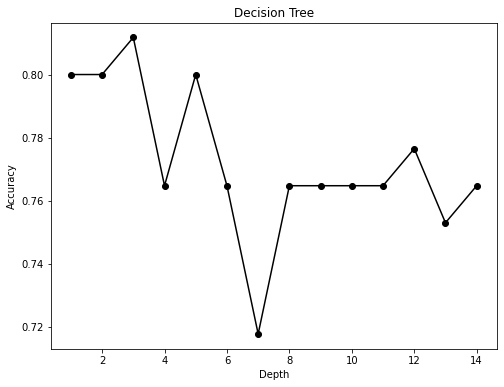

In [7]:
plt.figure(figsize=(8,6))

plt.plot(depth,acc, 'ko-')
plt.title('Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

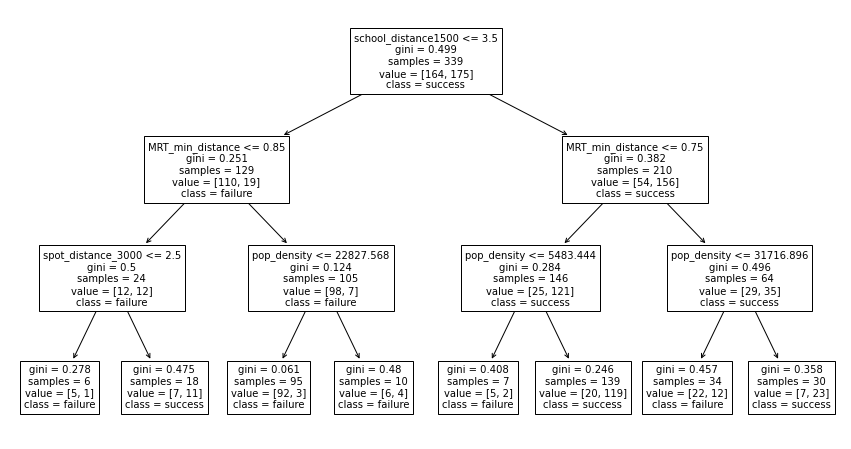

In [8]:
plt.figure(figsize=(15,8))

tree_model=DecisionTreeClassifier(random_state=123,max_depth=3)
tree_model.fit(X_train_selected,y_train)

tree.plot_tree(tree_model,
               feature_names=['MRT_min_distance','mall_distance1000','school_distance1500','spot_distance_3000','pop_density','rent'],
               class_names=["failure","success"],
               fontsize=10)  

plt.show()

#### RandomForest Model

In [9]:
acc=[]
depth=[]
for i in range(1,15):
    forest_model=RandomForestClassifier(random_state=123,max_depth=i)
    forest_model.fit(X_train_selected,y_train)
    acc.append(forest_model.score(X_test_selected,y_test))
    depth.append(i)

print(acc)
print("Best Accuracy:",max(acc),"Depth:",acc.index(max(acc))+1)

[0.8470588235294118, 0.8470588235294118, 0.8352941176470589, 0.8352941176470589, 0.8235294117647058, 0.8235294117647058, 0.8117647058823529, 0.8235294117647058, 0.8117647058823529, 0.8352941176470589, 0.8235294117647058, 0.8117647058823529, 0.8235294117647058, 0.8117647058823529]
Best Accuracy: 0.8470588235294118 Depth: 1


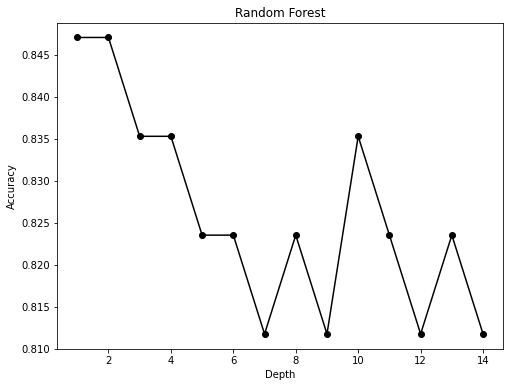

In [10]:
plt.figure(figsize=(8,6))

plt.plot(depth,acc, 'ko-')
plt.title('Random Forest')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

#### GradientBoosting Model

In [11]:
acc=[]
depth=[]
for i in range(1,15):
    GDBT_model=GradientBoostingClassifier(random_state=123,max_depth=i)
    GDBT_model.fit(X_train_selected,y_train)
    acc.append(GDBT_model.score(X_test_selected,y_test))
    depth.append(i)

print(acc)
print("Best Accuracy:",max(acc),"Depth:",acc.index(max(acc))+1)

[0.8117647058823529, 0.8117647058823529, 0.788235294117647, 0.8117647058823529, 0.8235294117647058, 0.8117647058823529, 0.8, 0.8235294117647058, 0.788235294117647, 0.7411764705882353, 0.7647058823529411, 0.7411764705882353, 0.7529411764705882, 0.7764705882352941]
Best Accuracy: 0.8235294117647058 Depth: 5


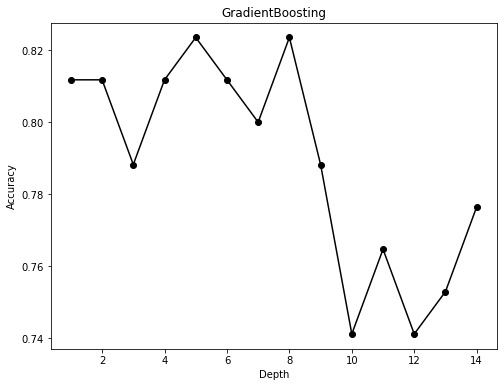

In [12]:
plt.figure(figsize=(8,6))

plt.plot(depth,acc, 'ko-')
plt.title('GradientBoosting')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

### Model Comparing

In [13]:
X_all_selected=X[['MRT_min_distance','mall_distance1000','school_distance1500','spot_distance_3000','人口密度','租金']]
y=data["選址成功"]

In [14]:
tree_model=DecisionTreeClassifier(random_state=123,max_depth=3)
accuracy_dt=cross_val_score(tree_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_dt=cross_val_score(tree_model,X_all_selected,y,scoring='precision',cv=10)
recall_dt=cross_val_score(tree_model,X_all_selected,y,scoring='recall',cv=10)
f1_dt=cross_val_score(tree_model,X_all_selected,y,scoring='f1',cv=10)
auc_dt=cross_val_score(tree_model,X_all_selected,y,scoring='roc_auc',cv=10)

print("Accuracy mean:",accuracy_dt.mean())
print("Precision mean:",precision_dt.mean())
print("Recall mean:",recall_dt.mean())
print("F1 mean:",f1_dt.mean())
print("AUC mean:",auc_dt.mean())

Accuracy mean: 0.7901439645625692
Precision mean: 0.7709735715170498
Recall mean: 0.8493506493506494
F1 mean: 0.8068534006263622
AUC mean: 0.8353086992372706


In [15]:
RF_model=RandomForestClassifier(random_state=123,max_depth=1)
accuracy_rf=cross_val_score(RF_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_rf=cross_val_score(RF_model,X_all_selected,y,scoring='precision',cv=10)
recall_rf=cross_val_score(RF_model,X_all_selected,y,scoring='recall',cv=10)
f1_rf=cross_val_score(RF_model,X_all_selected,y,scoring='f1',cv=10)
auc_rf=cross_val_score(RF_model,X_all_selected,y,scoring='roc_auc',cv=10)

print("Accuracy mean:",accuracy_rf.mean())
print("Precision mean:",precision_rf.mean())
print("Recall mean:",recall_rf.mean())
print("F1 mean:",f1_rf.mean())
print("AUC mean:",auc_rf.mean())

Accuracy mean: 0.7923588039867109
Precision mean: 0.7676995980754562
Recall mean: 0.8629870129870131
F1 mean: 0.8095855895051536
AUC mean: 0.8536242527313955


In [16]:
GB_model=GradientBoostingClassifier(random_state=123,max_depth=5)
accuracy_gb=cross_val_score(GB_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_gb=cross_val_score(GB_model,X_all_selected,y,scoring='precision',cv=10)
recall_gb=cross_val_score(GB_model,X_all_selected,y,scoring='recall',cv=10)
f1_gb=cross_val_score(GB_model,X_all_selected,y,scoring='f1',cv=10)
auc_gb=cross_val_score(GB_model,X_all_selected,y,scoring='roc_auc',cv=10)

print("Accuracy mean:",accuracy_gb.mean())
print("Precision mean:",precision_gb.mean())
print("Recall mean:",recall_gb.mean())
print("F1 mean:",f1_gb.mean())
print("AUC mean:",auc_gb.mean())

Accuracy mean: 0.8158361018826137
Precision mean: 0.8023557049357966
Recall mean: 0.8538961038961039
F1 mean: 0.8250464805607965
AUC mean: 0.878824469181612


In [17]:
lr_model=linear_model.LogisticRegression(random_state=123)
accuracy_lr=cross_val_score(lr_model,X_all_selected,y,scoring='accuracy',cv=10)
precision_lr=cross_val_score(lr_model,X_all_selected,y,scoring='precision',cv=10)
recall_lr=cross_val_score(lr_model,X_all_selected,y,scoring='recall',cv=10)
f1_lr=cross_val_score(lr_model,X_all_selected,y,scoring='f1',cv=10)
auc_lr=cross_val_score(lr_model,X_all_selected,y,scoring='roc_auc',cv=10)

print("Accuracy mean:",accuracy_lr.mean())
print("Precision mean:",precision_lr.mean())
print("Recall mean:",recall_lr.mean())
print("F1 mean:",f1_lr.mean())
print("AUC mean:",auc_lr.mean())

Accuracy mean: 0.7853820598006644
Precision mean: 0.7619405071578984
Recall mean: 0.8536796536796537
F1 mean: 0.8034018647210491
AUC mean: 0.8574278499278499


In [18]:
acc_all=[accuracy_dt.mean(),accuracy_rf.mean(),accuracy_gb.mean(),accuracy_lr.mean()]
pre_all=[precision_dt.mean(),precision_rf.mean(),precision_gb.mean(),precision_lr.mean()]
recall_all=[recall_dt.mean(),recall_rf.mean(),recall_gb.mean(),recall_lr.mean()]
f1_all=[f1_dt.mean(),f1_rf.mean(),f1_gb.mean(),f1_lr.mean()]
auc_all=[auc_dt.mean(),auc_rf.mean(),auc_gb.mean(),auc_lr.mean()]

print("Accuracy:",acc_all)
print("Precision:",pre_all)
print("Recall:",recall_all)
print("F1:",f1_all)
print("AUC:",auc_all)


Accuracy: [0.7901439645625692, 0.7923588039867109, 0.8158361018826137, 0.7853820598006644]
Precision: [0.7709735715170498, 0.7676995980754562, 0.8023557049357966, 0.7619405071578984]
Recall: [0.8493506493506494, 0.8629870129870131, 0.8538961038961039, 0.8536796536796537]
F1: [0.8068534006263622, 0.8095855895051536, 0.8250464805607965, 0.8034018647210491]
AUC: [0.8353086992372706, 0.8536242527313955, 0.878824469181612, 0.8574278499278499]


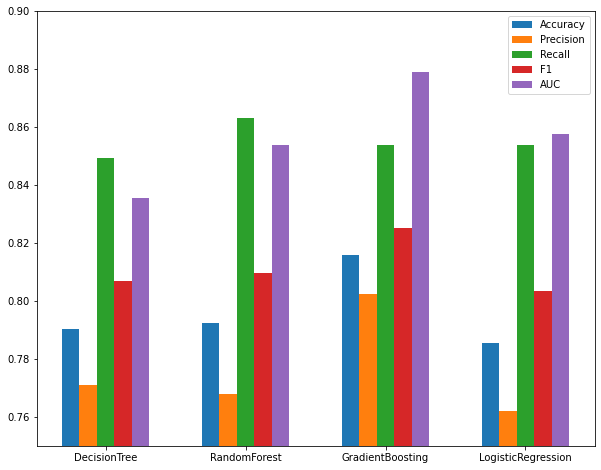

In [19]:
model_name=["DecisionTree","RandomForest","GradientBoosting","LogisticRegression"]

plt.figure(figsize=(10,8))

index=[1,9,17,25]
plt.bar(index,acc_all,width=1,label="Accuracy")

index=[p+1 for p in index]  
plt.bar(index,pre_all,width=1,label="Precision")

index=[p+1 for p in index]  
plt.bar(index,recall_all,width=1,label="Recall")

index=[p+1 for p in index]  
plt.bar(index,f1_all,width=1,label="F1")

index=[p+1 for p in index]  
plt.bar(index,auc_all,width=1,label="AUC")

index=[p-2 for p in index]  
plt.legend()
plt.ylim(0.75,0.9)
plt.xticks(index, model_name) 

plt.show()